In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D as Conv2D
from keras.layers import Flatten, MaxPooling2D
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.layers import Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
batch_size = 1
img_size = (150, 150)
img_path = '/content/drive/MyDrive/BT_AI_CNN/tien_giay/train_tien_giay'

In [4]:
image_generator = ImageDataGenerator(
    rescale = 1./255,
    brightness_range = (0.8, 1.2),
    zoom_range= (0.9, 1.2),
    validation_split= 0.2)

train_dataset= image_generator.flow_from_directory(img_path,
                                      target_size = img_size,
                                      batch_size = batch_size,
                                      shuffle = True,
                                      class_mode = 'categorical',
                                      subset = 'training')
validation_dataset = image_generator.flow_from_directory(img_path,
                                      target_size = img_size,
                                      batch_size = batch_size,  
                                      shuffle = True,
                                      class_mode = 'categorical',
                                      subset = 'validation')

Found 82 images belonging to 11 classes.
Found 14 images belonging to 11 classes.


In [5]:
train_dataset.classes
print(train_dataset.class_indices)


{'tien 1 dong': 0, 'tien 100 dong': 1, 'tien 1000 dong': 2, 'tien 10000': 3, 'tien 100000': 4, 'tien 200 dong': 5, 'tien 2000 dong': 6, 'tien 30 dong': 7, 'tien 500 dong': 8, 'tien 5000 dong': 9, 'tien 50000': 10}


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(512, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                        

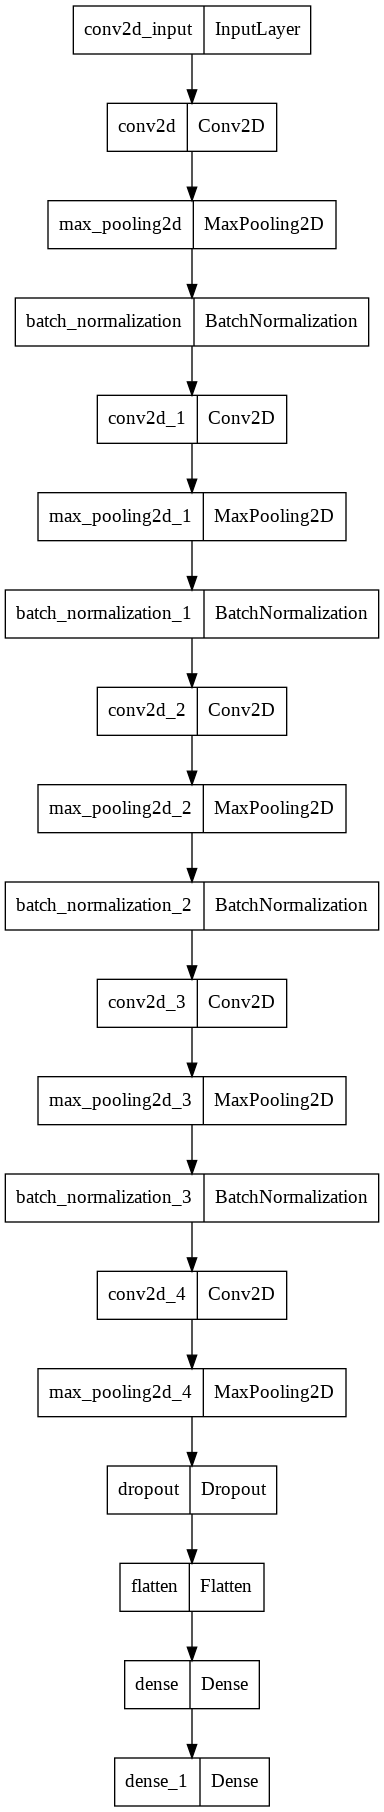

In [7]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [9]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = opt, loss ='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_dataset,batch_size=65,epochs=20,validation_data=validation_dataset)

In [11]:
model.predict(train_dataset)

array([[7.03692362e-02, 2.29093626e-01, 2.43489482e-02, 8.25271159e-02,
        1.32578760e-01, 3.02405260e-03, 3.40983681e-02, 1.96401821e-03,
        8.27260432e-04, 1.56132169e-02, 4.05555427e-01],
       [1.41460761e-01, 1.18842997e-01, 3.70829552e-01, 3.89762148e-02,
        4.54479828e-02, 2.05710926e-03, 2.50575300e-02, 2.94106780e-03,
        6.23700907e-04, 9.15488321e-03, 2.44608194e-01],
       [1.23956443e-06, 1.65965253e-06, 1.10259198e-05, 5.16078489e-06,
        5.12130282e-06, 3.64890002e-05, 7.72077055e-06, 4.47048697e-05,
        4.22579387e-06, 9.99876499e-01, 6.16966281e-06],
       [3.17682177e-02, 3.08248540e-03, 3.06503735e-02, 3.78376618e-02,
        4.01251093e-02, 6.87744061e-04, 5.26541518e-03, 9.35309450e-04,
        1.56864920e-03, 2.65851673e-02, 8.21493864e-01],
       [1.38412815e-05, 2.21875249e-04, 9.55775886e-06, 7.85070413e-04,
        5.13176899e-04, 5.16183786e-02, 4.10855655e-03, 3.56965154e-01,
        5.85703850e-01, 5.45433722e-05, 5.98574888e-

In [12]:
validation_dataset.labels

array([ 0,  1,  2,  2,  3,  4,  5,  6,  7,  7,  7,  8,  9, 10],
      dtype=int32)

Loại tiền 200 dong


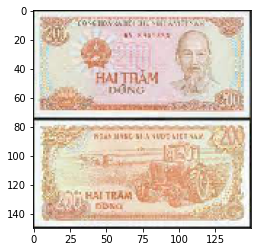

In [20]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/BT_AI_CNN/tien_giay/nhandien/200 dong.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print(" Loại tiền 1 dong ")
if(test==1):
    print("Loại tiền 100 dong")
if(test ==2):
    print("Loại tiền 1000 dong")
if(test==3):
    print("Loại tiền 10000 dong")
if(test ==4):
    print("Loại tiền 100000 dong")
if(test==5):
    print("Loại tiền 200 dong")
if(test ==6):
    print("Loại tiền 2000 dong")
if(test==7):
    print("Loại tiền 30 dong")
if(test ==8):
    print("Loại tiền 50000 dong ")
if(test==9):
    print("Loại tiền 5000 dong")
if(test==10):
    print("Loại tiền 50000 dong")

Loại tiền 2000 dong


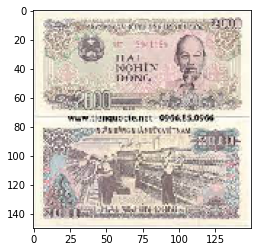

In [15]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/BT_AI_CNN/tien_giay/nhandien/2000.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print(" Loại tiền 1 dong ")
if(test==1):
    print("Loại tiền 100 dong")
if(test ==2):
    print("Loại tiền 1000 dong")
if(test==3):
    print("Loại tiền 10000 dong")
if(test ==4):
    print("Loại tiền 100000 dong")
if(test==5):
    print("Loại tiền 200 dong")
if(test ==6):
    print("Loại tiền 2000 dong")
if(test==7):
    print("Loại tiền 30 dong")
if(test ==8):
    print("Loại tiền 500 dong ")
if(test==9):
    print("Loại tiền 5000 dong")
if(test==10):
    print("Loại tiền 50000 dong")